# Part II - Prosper Loan Data Exploration
## by Solomon Nyamson



## Investigation Overview


The analysis will begin by looking into the factors for the interest rate and annual percentage rate of the borrowers, respectively.

What distinguishes the borrower rate from the borrower APR, and what accounts for the differences between the two.


## Dataset Overview

 This project explores the Proper loan dataset, which is America’s first marketplace lending platform, with over $9 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosper-loan.csv')

# Select only the variables neccessary for analysis and save it to DataFrame called data
data = loan_data[[
    'ListingKey',
    'LoanOriginalAmount',
    'Term',
    'BorrowerAPR',
    'BorrowerRate',
    'ProsperRating (Alpha)',
    'EstimatedReturn',
    'MonthlyLoanPayment',
    'EmploymentStatus',
    'IncomeRange',
    'StatedMonthlyIncome',
    'LoanStatus',
    'ListingCategory (numeric)'
    ]].copy()

In [4]:
#For better reading and understanding , the ProsperRating (Aplha) and ListingCategory (Numeric) columns will be renamed to ProsperRating and ListingCategory respectively
data.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating','ListingCategory (numeric)': 'ListingCategory'},inplace = True)

In [5]:
# Simple Data Wrngling for data type conversion to categorial types

# Therefore a for in loop will be to aid this conversion

var_dict = {
    'LoanStatus': [
        'Current',
        'Completed',
        'Chargedoff',
        'Defaulted',
        'Past Due (1-15 days)',
        'Past Due (31-60 days)',
        'Past Due (61-90 days)',
        'Past Due (91-120 days)',
        'Past Due (16-30 days)',
        'FinalPaymentInProgress',
        'Past Due (>120 days)',
        'Cancelled'
    ],
    'Term': [
        36,
        60,
        12
    ],
    'EmploymentStatus': [
        'Employed',
        'Full-time',
        'Self-employed',
        'Not available',
        'Other',
        'Part-time',
        'Not employed',
        'Retired'
    ],
    'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
}

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered = True,
        categories = var_dict[var]
    )
    data[var] = data[var].astype(ordered_var)

In [6]:
# Remove Duplicates and Missing Values
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

## The Distribution of Borrowers Interest Rate and Borrowers APR

The Borrower's Rate (interest rate) refers to the annual cost of a loan to a borrower and is expressed as a percentage. The interest rate does not include fees charged for the loan.

The Borrower's APR is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage insurance, most closing costs, discount points and loan origination fees) to reflect the total cost of the loan.

The Borrowers APR is always expected to be higher than the Borrowers Rate which does not include any fees charged for the loan in question and this implies that the distribution for both variable should be similar with a subtle difference.

From the plots, there are two peaks centered at 0.2 and 0.28, respectively, and a very shaped peak between 0.35 and 0.36. A very small number of loans have an APR higher than 0.4.

Plotting the two distributions on one another, it can be affirmed that,  the interest rate retains the same multi-modal distribution with slightly lower values.

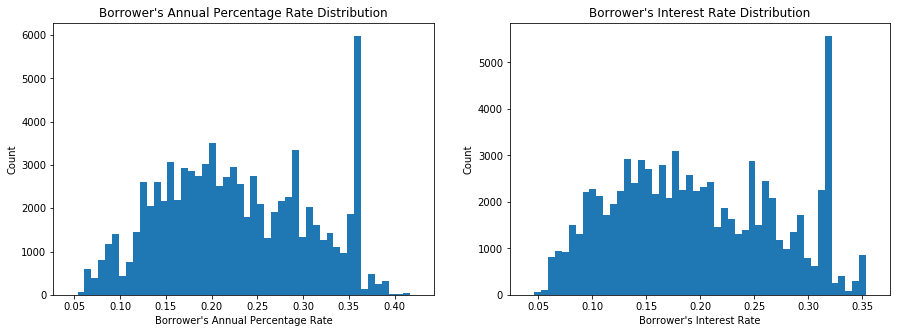

In [7]:
# set figure size
plt.figure(figsize = [15, 5])

# plot first graph
plt.subplot(1, 2, 1)
sb.distplot(
    data['BorrowerAPR'], kde=False, hist_kws = {'alpha' : 1}
)

# assign title and axis labels
plt.title("Borrower's Annual Percentage Rate Distribution")
plt.ylabel('Count')
plt.xlabel("Borrower's Annual Percentage Rate")

# plot second graph
plt.subplot(1, 2, 2)
sb.distplot(
    data['BorrowerRate'], kde=False,hist_kws = {'alpha' : 1}
)

# assign title and axis labels
plt.title("Borrower's Interest Rate Distribution")
plt.ylabel('Count')
plt.xlabel("Borrower's Interest Rate");

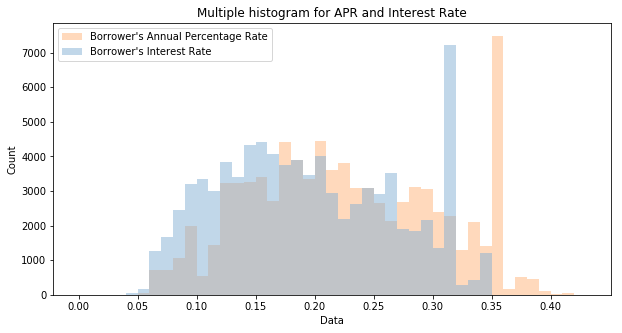

In [8]:
# assign appropriate bin size
bin_size = 0.01
bins = np.arange(0, data['BorrowerAPR'].max() + bin_size, bin_size)

# set the figure size
plt.figure(figsize=(10,5))

# plot first graph
plt.hist(
    data['BorrowerAPR'],
    bins = bins,
    color = "#ffb47b",
    alpha = 0.5,
    label = "Borrower's Annual Percentage Rate",
)

# plot second graph
plt.hist(
    data['BorrowerRate'],
    bins = bins,
    color = "#84b1d4",
    alpha = 0.5,
    label = "Borrower's Interest Rate",
)

# assing title and axis labels
plt.legend()
plt.title("Multiple histogram for APR and Interest Rate")
plt.ylabel('Count')
plt.xticks([0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
plt.xlabel("Data");

## How does the Estimated Return  relates to the Borrower Rate of a loan and Prosper Rating

This plot shows a clear pattern between the three variables. The estimated return definitely has a positive linear relationship with the borrower's interest rate and Prosper rating.

This implies that, the borrower rate of a loan will increase if the underlying prosper rating increase so as the estimated return associated with the loan.

Loans that fall under Ratings E and HR are highly associated with high borrower rate indicating the risk level of such loans.

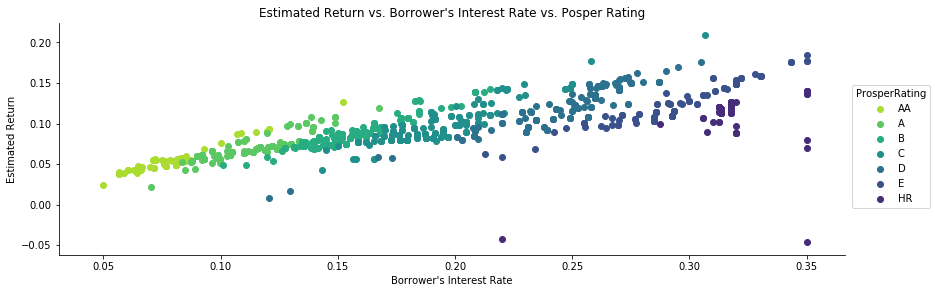

In [9]:
# Randomly Select 1000 samples from each variable
loans_sample = data.sample(n = 1000, replace = False)

# Create a facetGrid plot
g = sb.FacetGrid(
    data = loans_sample, 
    hue = 'ProsperRating', 
    size = 4,
    aspect = 3,
    palette = 'viridis_r'
)
g.map(
    plt.scatter, 
    'BorrowerRate', 
    'EstimatedReturn'
)

# Assign Legend, Title and Axis labels
g.add_legend()
plt.title("Estimated Return vs. Borrower's Interest Rate vs. Posper Rating")
plt.ylabel('Estimated Return')
plt.xlabel("Borrower's Interest Rate");

## How does the Stated Monthly Income reacts with the Monthly Loan Payment

This plot confirms that there is a high positive correlation between the monthly payment and the stated monthly income.

It can be noticed that, with regards to the payment plan of a loan, the monthly repayment will always be proportional to the stated monthly income of the borrower.

In [12]:
# Stated Monthly Income have outliers which are to be removed

# define a function to find all outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

# get the number of outliers
outliers = find_outliers_IQR(data['StatedMonthlyIncome'])


# Drop all outliers from the dataset
data.drop(data.query('StatedMonthlyIncome.isin(@outliers).values').index, inplace=True) 

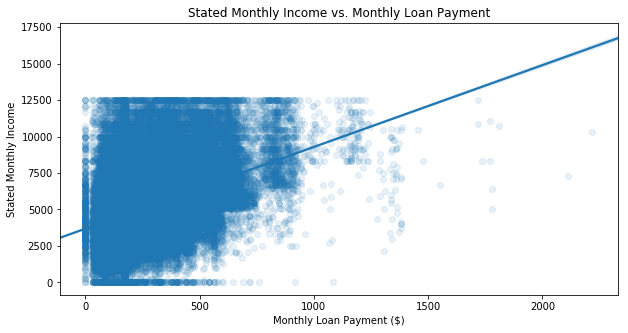

In [13]:
# Set the figure size
plt.figure(figsize = (10,5))

# plot the graph
sb.regplot(
    data = data,
    y = 'StatedMonthlyIncome',
    x = 'MonthlyLoanPayment',
    truncate = False,
    scatter_kws = {'alpha':1/10}
)

# Assign title and axis labels
plt.title('Stated Monthly Income vs. Monthly Loan Payment')
plt.ylabel('Stated Monthly Income')
plt.xlabel('Monthly Loan Payment ($)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_prosper_loan_exploration.ipynb --to slides --post serve --no-input --no-prompt 

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file
